<a href="https://colab.research.google.com/github/SKShorna/Machine-Learning/blob/master/Chest_X_ray_restnet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# memory footprint support libraries/code
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU

  Created wheel for gputil: filename=GPUtil-1.4.0-cp36-none-any.whl size=7413 sha256=d9b78825fb7ead1e90e4fcb840b2a5afb68f18f1a0d15396964585813f119a5f
  Stored in directory: /root/.cache/pip/wheels/3d/77/07/80562de4bb0786e5ea186911a2c831fdd0018bda69beab71fd
Successfully built gputil


In [ ]:
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print(gpu.name)
 print('==========')
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " \
                        + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB" \
               .format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm()

Tesla P100-PCIE-16GB
Gen RAM Free: 12.8 GB  | Proc size: 160.1 MB
GPU RAM Free: 16280MB | Used: 0MB | Util   0% | Total 16280MB


In [ ]:
!pip install "torch==1.4" "torchvision==0.5.0"

     |████████████████████████████████| 753.4MB 20kB/s 
     |████████████████████████████████| 4.0MB 36.4MB/s 
  Found existing installation: torch 1.5.0+cu101
    Uninstalling torch-1.5.0+cu101:
      Successfully uninstalled torch-1.5.0+cu101
  Found existing installation: torchvision 0.6.0+cu101
    Uninstalling torchvision-0.6.0+cu101:
      Successfully uninstalled torchvision-0.6.0+cu101


In [ ]:
!pip list | grep -e fastai -e torch -e torchvision -e matplotlib -e tensorflow -e keras

In [ ]:
import os
from fastai.vision import *
from fastai.metrics import accuracy, error_rate#

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
data_root='/content/drive/My Drive/x_ray'

train_data_dir = os.path.join(data_root, 'train')
test_data_dir = os.path.join(data_root, 'test') 

#model_dir = '/content/drive/My Drive/models'

In [ ]:
classes = ['normal','pneumonia']

In [ ]:
np.random.seed(42)
data = ImageDataBunch.from_folder(train_data_dir, train=".", valid_pct=0.2, bs=50,
        ds_tfms=get_transforms(), size=224, num_workers=6)
       # ds_tfms=get_transforms(do_flip=False, max_rotate = 0.0,max_warp = 0.0), size=224, num_workers=6) Not a good idea to change these transformations

data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (320 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
normal,normal,normal,normal,normal
Path: /content/drive/My Drive/x_ray/train;

Valid: LabelList (80 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
pneumonia,pneumonia,normal,pneumonia,normal
Path: /content/drive/My Drive/x_ray/train;

Test: None

In [ ]:
doc(ImageDataBunch)

NameError: ignored

In [ ]:
?get_transforms()

In [ ]:
doc(get_transforms)

In [ ]:
data.classes

['normal', 'pneumonia']

In [ ]:
data.c

2

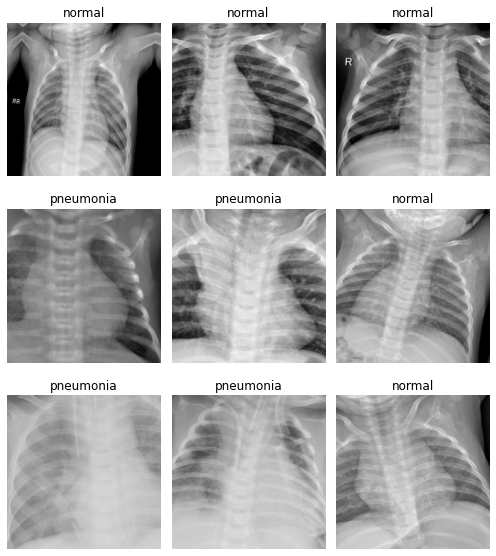

In [ ]:
data.show_batch(rows=3, figsize=(7,8))

In [ ]:
doc(data.show_batch)

In [ ]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['normal', 'pneumonia'], 2, 320, 80)

In [ ]:
learn = cnn_learner(data, models.resnet50, metrics=[error_rate,accuracy])

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [ ]:
learn.summary()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 112, 112]       9,408      False     
______________________________________________________________________
BatchNorm2d          [64, 112, 112]       128        True      
______________________________________________________________________
ReLU                 [64, 112, 112]       0          False     
______________________________________________________________________
MaxPool2d            [64, 56, 56]         0          False     
______________________________________________________________________
Conv2d               [64, 56, 56]         4,096      False     
______________________________________________________________________
BatchNorm2d          [64, 56, 56]         128        True      
______________________________________________________________________
Conv2d               [64, 56, 56]         36,864     False     
___________________________________________________

In [ ]:
defaults.device = torch.device('cuda') # use gpu

In [ ]:
doc(fit_one_cycle)

In [ ]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.692582,0.180870,0.112500,0.887500,00:32
1,0.474393,0.081390,0.025000,0.975000,00:21
2,0.442220,0.894911,0.225000,0.775000,00:20
3,0.378285,2.021052,0.350000,0.650000,00:21
4,0.356964,1.363505,0.287500,0.712500,00:21


In [ ]:
learn.save('x_ray_pneumonia_wip_res50_01_NEW')

In [ ]:
learn.load('x_ray_pneumonia_wip_res50_01_NEW');

In [ ]:
learn.summary()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 112, 112]       9,408      False     
______________________________________________________________________
BatchNorm2d          [64, 112, 112]       128        True      
______________________________________________________________________
ReLU                 [64, 112, 112]       0          False     
______________________________________________________________________
MaxPool2d            [64, 56, 56]         0          False     
______________________________________________________________________
Conv2d               [64, 56, 56]         4,096      False     
______________________________________________________________________
BatchNorm2d          [64, 56, 56]         128        True      
______________________________________________________________________
Conv2d               [64, 56, 56]         36,864     False     
___________________________________________________

In [ ]:
learn.unfreeze()

In [ ]:
learn.summary()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 112, 112]       9,408      True      
______________________________________________________________________
BatchNorm2d          [64, 112, 112]       128        True      
______________________________________________________________________
ReLU                 [64, 112, 112]       0          False     
______________________________________________________________________
MaxPool2d            [64, 56, 56]         0          False     
______________________________________________________________________
Conv2d               [64, 56, 56]         4,096      True      
______________________________________________________________________
BatchNorm2d          [64, 56, 56]         128        True      
______________________________________________________________________
Conv2d               [64, 56, 56]         36,864     True      
___________________________________________________

In [ ]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


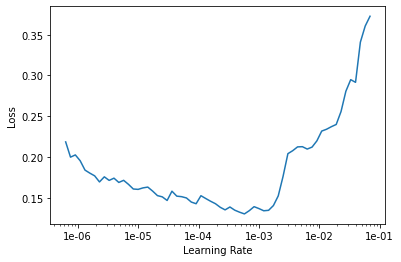

In [ ]:
learn.recorder.plot()

Min numerical gradient: 6.31E-07
Min loss divided by 10: 5.75E-05


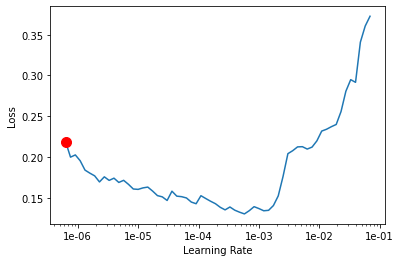

In [ ]:
learn.recorder.plot(suggestion=True)

In [ ]:
min_grad_lr = learn.recorder.min_grad_lr
print('scientific:', min_grad_lr)
print('decimal: {0:.10f}'.format(min_grad_lr))

scientific: 6.309573444801933e-07
decimal: 0.0000006310


In [ ]:
learn.fit_one_cycle(6, max_lr=slice(1e-5,1e-3))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.106672,0.380627,0.112500,0.887500,00:21
1,0.120874,0.004084,0.000000,1.000000,00:21
2,0.167047,0.003693,0.000000,1.000000,00:21
3,0.174488,0.001140,0.000000,1.000000,00:21
4,0.156295,0.008197,0.000000,1.000000,00:21
5,0.138362,0.027598,0.012500,0.987500,00:21


In [ ]:
learn.data.batch_size

50

In [ ]:
preds = learn.pred_batch()
len(preds)

50

In [ ]:
data.classes

['normal', 'pneumonia']

In [ ]:
preds[:10]

tensor([[1.4072e-03, 9.9859e-01],
        [3.8064e-09, 1.0000e+00],
        [1.0000e+00, 1.9363e-12],
        [1.3493e-01, 8.6507e-01],
        [1.0000e+00, 1.1128e-06],
        [1.0000e+00, 1.0646e-06],
        [4.5745e-02, 9.5425e-01],
        [9.9192e-01, 8.0799e-03],
        [1.6669e-13, 1.0000e+00],
        [1.0000e+00, 1.1668e-16]])

In [ ]:
pip install colored

     |████████████████████████████████| 61kB 1.8MB/s 
  Created wheel for colored: filename=colored-1.4.2-cp36-none-any.whl size=14003 sha256=207349581afa284b2f80ee03b453afd1089f2cec62122aa19a6e42ef89fd9e6d
  Stored in directory: /root/.cache/pip/wheels/ec/10/5e/d17d5ef644e1051a753bd98f3796789ec39bc3337cd36637f3
Successfully built colored


In [ ]:
import colored
print(colored.bg("white") + colored.fg("green") + "Hello world!")

Hello world!


In [ ]:
def format_pred(element_in):
  outval = 'normal: {0:.10f}'.format(element_in)
  return outval  
  print(outval)

In [ ]:
n = 1
for element in preds[:10]:
  if element[0] > element[1]:
    vnorm = format_pred(element[0])  
    vnormprt = colored.bg("white") + colored.fg("green") + vnorm
    vpneumprt = format_pred(element[1]) 
  else:
    vnormprt = format_pred(element[0]) 
    vpneum = format_pred(element[1])  
    vpneumprt = colored.bg("white") + colored.fg("green") + vpneum

  print('Image',str(n), vnormprt, vpneumprt)
  n += 1

Image 1 normal: 0.0014071801 normal: 0.9985927939
Image 2 normal: 0.0000000038 normal: 1.0000000000
Image 3 normal: 1.0000000000 normal: 0.0000000000
Image 4 normal: 0.1349277049 normal: 0.8650723100
Image 5 normal: 0.9999989271 normal: 0.0000011128
Image 6 normal: 0.9999989271 normal: 0.0000010646
Image 7 normal: 0.0457451046 normal: 0.9542549253
Image 8 normal: 0.9919199944 normal: 0.0080799414
Image 9 normal: 0.0000000000 normal: 1.0000000000
Image 10 normal: 1.0000000000 normal: 0.0000000000


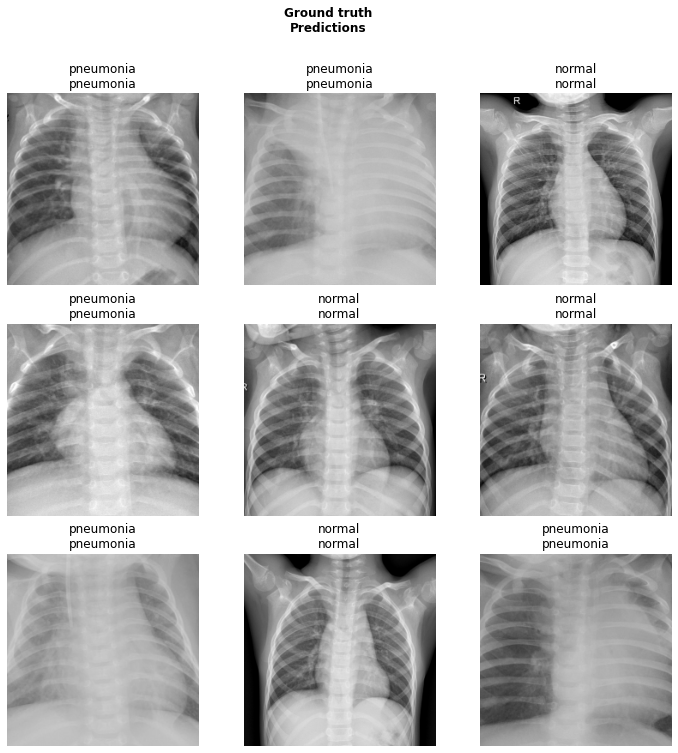

In [ ]:
learn.show_results(rows=3)

In [ ]:
doc(learn.show_results)

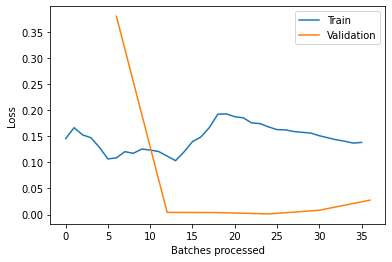

In [ ]:
learn.recorder.plot_losses()

In [ ]:
doc(learn.recorder.plot_losses)

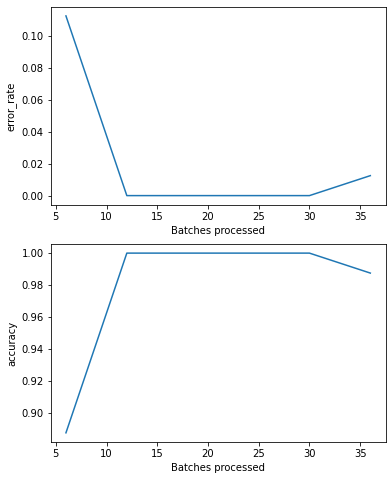

In [ ]:
learn.recorder.plot_metrics()

In [ ]:
doc(learn.recorder.plot_losses)

In [ ]:
doc(learn.fit_one_cycle)

In [ ]:
learn.save('x_ray_pneumonia_res50_wip_final')

In [ ]:
learn.load('x_ray_pneumonia_res50_wip_final')

Learner(data=ImageDataBunch;

Train: LabelList (320 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
normal,normal,normal,normal,normal
Path: /content/drive/My Drive/x_ray/train;

Valid: LabelList (80 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
pneumonia,pneumonia,normal,pneumonia,normal
Path: /content/drive/My Drive/x_ray/train;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64

In [ ]:
learn.summary()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 112, 112]       9,408      True      
______________________________________________________________________
BatchNorm2d          [64, 112, 112]       128        True      
______________________________________________________________________
ReLU                 [64, 112, 112]       0          False     
______________________________________________________________________
MaxPool2d            [64, 56, 56]         0          False     
______________________________________________________________________
Conv2d               [64, 56, 56]         4,096      True      
______________________________________________________________________
BatchNorm2d          [64, 56, 56]         128        True      
______________________________________________________________________
Conv2d               [64, 56, 56]         36,864     True      
___________________________________________________

In [ ]:
learn.fit_one_cycle(4, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.111757,0.040602,0.025000,0.975000,00:21
1,0.081565,0.048132,0.025000,0.975000,00:21
2,0.081378,0.047919,0.012500,0.987500,00:21
3,0.069904,0.052092,0.012500,0.987500,00:21


In [ ]:
learn.save('x_ray_pneumonia_wip_Res50_final')

In [ ]:
learn.load('x_ray_pneumonia_wip_Res50_final')

Learner(data=ImageDataBunch;

Train: LabelList (320 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
normal,normal,normal,normal,normal
Path: /content/drive/My Drive/x_ray/train;

Valid: LabelList (80 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
pneumonia,pneumonia,normal,pneumonia,normal
Path: /content/drive/My Drive/x_ray/train;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

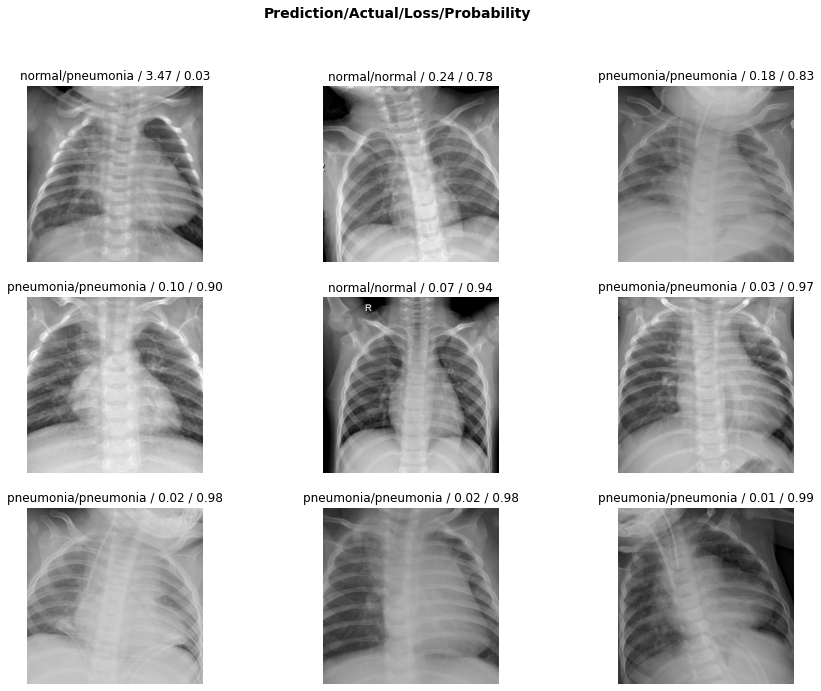

In [ ]:
interp.plot_top_losses(9,figsize=(15,11))

In [ ]:
interp.most_confused(min_val=1)

[('pneumonia', 'normal', 1)]

In [ ]:
doc(interp.plot_top_losses)

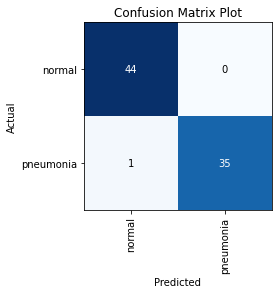

In [ ]:
interp.plot_confusion_matrix(title='Confusion Matrix Plot')

In [ ]:
learn.export('export.pkl')